Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Name of Activity ** | **Final Project**
**Names:** | Mateo, Denver M.
           |Roa, Robidane Jordan A.|
**Section** | CPE32S1
**Date Performed**: | May 07, 2024
**Date Submitted**: | May  18, 2024
**Instructor**: | Engr. Ryan Francisco

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


# Show how to prepare the dataset into training and test sets (EDA)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd


In [ ]:
IMAGE_SIZE = (30, 30)

In [ ]:
sdir=r'/content/drive/MyDrive/Multi-classWeatherDataset'
ht=0
wt=0
samples=0
sample_count=10
filepaths=[]
classes=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    for i, f in enumerate(flist):
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        classes.append(klass)
        #  get image shape to use for averaging of image shapes
        if i < sample_count:
            img=plt.imread(fpath)
            ht += img.shape[0]
            wt += img.shape[1]
            samples +=1
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(classes, name='classes')
df=pd.concat([Fseries, Lseries], axis=1)
class_count= len(df['classes'].unique())
print('The dataframe has ', class_count, ' classes')
# split df into train_df, test_df and valid_df
train_df, dummy_df=train_test_split(df, train_size=.85, shuffle=True, random_state=312, stratify=df['classes'])
valid_df, test_df = train_test_split(dummy_df, train_size=.3, shuffle=True, random_state=321, stratify=dummy_df['classes'])
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

The dataframe has  4  classes
train_df lenght:  963   test_df length:  119   valid_df length:  51


                                              filepaths  classes
994   /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
627   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
324   /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
915   /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
1073  /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
...                                                 ...      ...
77    /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
758   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
26    /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
430   /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
762   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise

[963 rows x 2 columns]


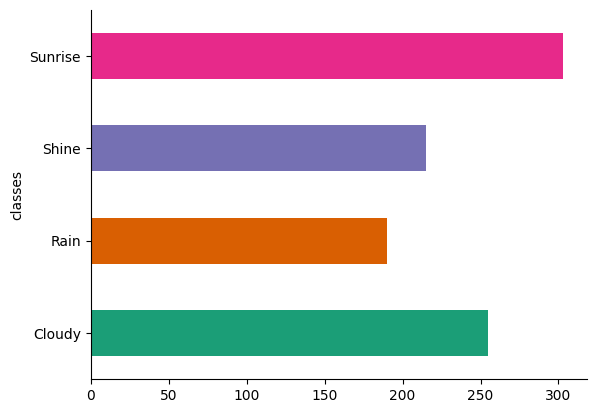

In [ ]:
print(train_df)
from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

                                             filepaths  classes
106  /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
405  /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
286  /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
473  /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
299  /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
..                                                 ...      ...
463  /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
38   /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
675  /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
517  /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
681  /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise

[119 rows x 2 columns]


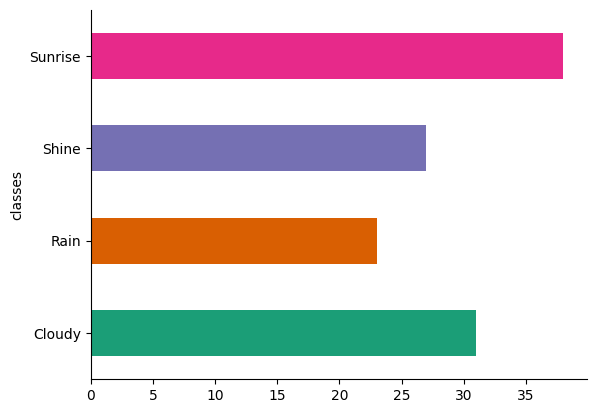

In [ ]:
print(test_df)
from matplotlib import pyplot as plt
import seaborn as sns
test_df.groupby('classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

                                              filepaths  classes
429   /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
267   /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
806   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
124   /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
1089  /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
737   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
916   /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
427   /content/drive/MyDrive/Multi-classWeatherDatas...    Shine
491   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
1062  /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
1117  /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
964   /content/drive/MyDrive/Multi-classWeatherDatas...   Cloudy
198   /content/drive/MyDrive/Multi-classWeatherDatas...     Rain
830   /content/drive/MyDrive/Multi-classWeatherDatas...  Sunrise
929   /content/drive/MyDr

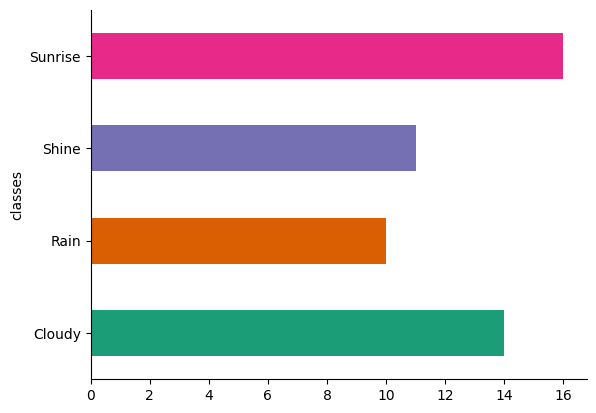

In [ ]:
print(valid_df)
from matplotlib import pyplot as plt
import seaborn as sns
valid_df.groupby('classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a baseline MLP classification model

In [ ]:
batch_size = 5
epochs = 50

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='classes',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepaths',
    y_col='classes',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='classes',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

model = Sequential([
    Flatten(input_shape=(30, 30, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(class_count, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 963 validated image filenames belonging to 4 classes.
Found 51 validated image filenames belonging to 4 classes.
Found 119 validated image filenames belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 128)               345728    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total par

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=len (valid_generator),
)


Epoch 1/50
193/193 [==============================] - 25s 125ms/step - loss: 0.8343 - accuracy: 0.6573 - val_loss: 0.6357 - val_accuracy: 0.7843
Epoch 2/50
193/193 [==============================] - 10s 52ms/step - loss: 0.6213 - accuracy: 0.7487 - val_loss: 0.5192 - val_accuracy: 0.7647
Epoch 3/50
193/193 [==============================] - 11s 55ms/step - loss: 0.5576 - accuracy: 0.7882 - val_loss: 0.5814 - val_accuracy: 0.7451
Epoch 4/50
193/193 [==============================] - 10s 49ms/step - loss: 0.5282 - accuracy: 0.8017 - val_loss: 0.4465 - val_accuracy: 0.8431
Epoch 5/50
193/193 [==============================] - 11s 57ms/step - loss: 0.5512 - accuracy: 0.7819 - val_loss: 0.5884 - val_accuracy: 0.8039
Epoch 6/50
193/193 [==============================] - 10s 54ms/step - loss: 0.4869 - accuracy: 0.8069 - val_loss: 0.5317 - val_accuracy: 0.8235
Epoch 7/50
193/193 [==============================] - 10s 49ms/step - loss: 0.4545 - accuracy: 0.8235 - val_loss: 0.4623 - val_accuracy

# Evaluate your model using the dataset

In [ ]:
loss, accuracy = model.evaluate(valid_generator)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


11/11 [==============================] - 1s 47ms/step - loss: 0.4592 - accuracy: 0.8235
Validation Loss: 0.45922017097473145
Validation Accuracy: 0.8235294222831726


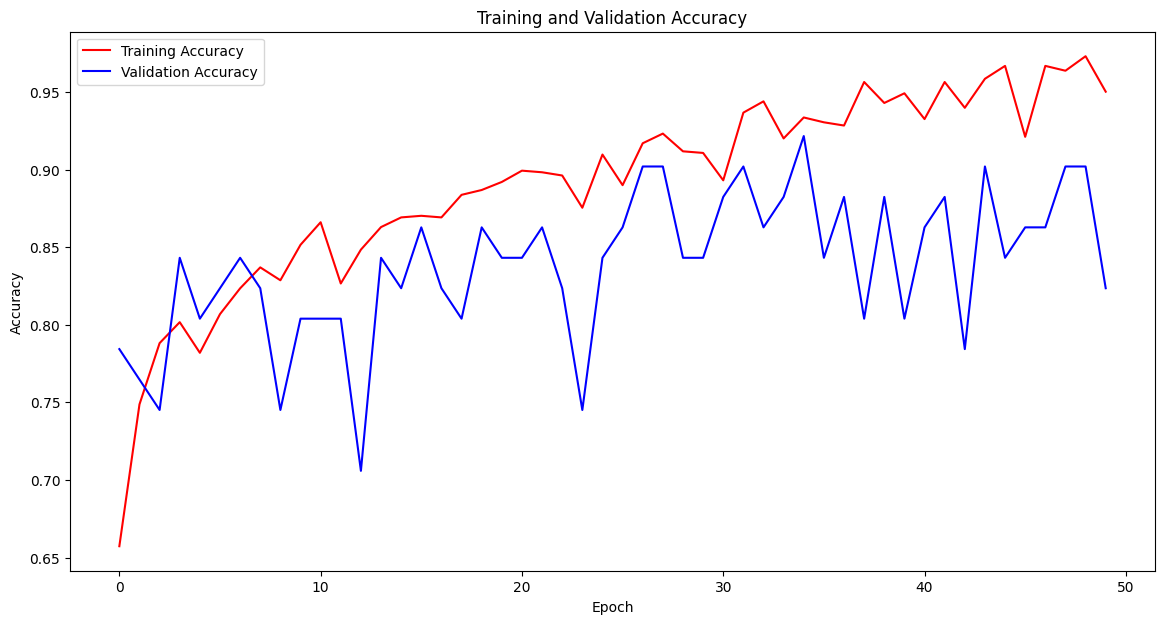

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history)

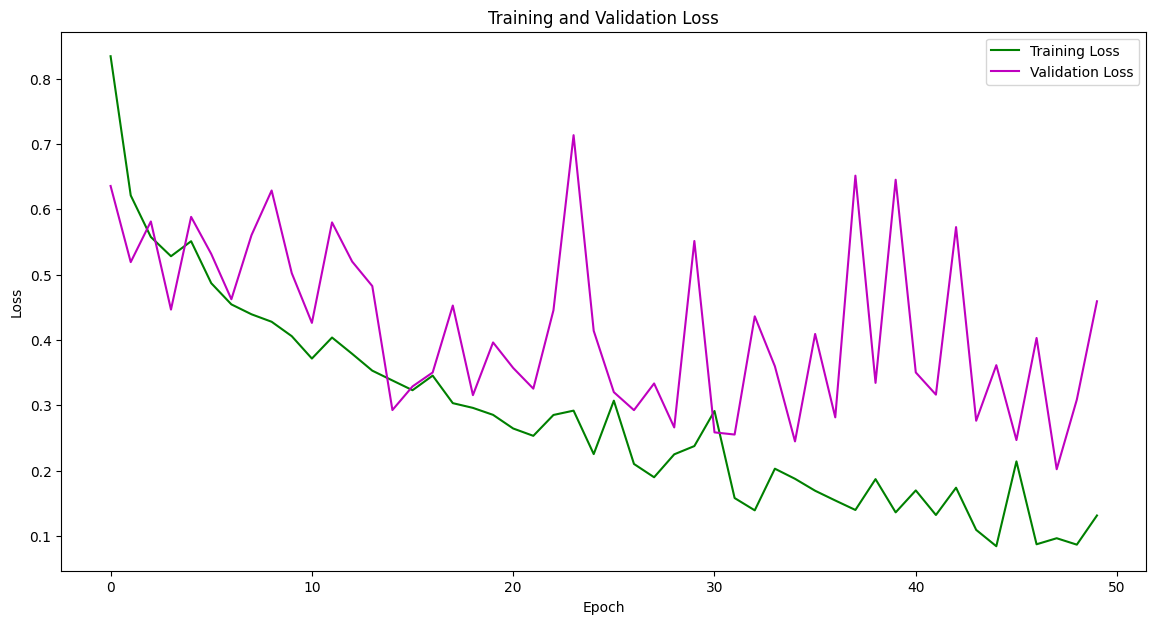

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(14, 7))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'm', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


# Improve

In [ ]:
batch_size = 64
epoch = 30
model = Sequential([
    Flatten(input_shape=(30, 30, 3)),
    Dense(128, kernel_initializer='glorot_uniform', activation='relu'),
    Dense(64, kernel_initializer='glorot_uniform', activation='relu'),
    Dense(32, kernel_initializer='glorot_uniform', activation='relu'),
    Dense(class_count, kernel_initializer='glorot_uniform', activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epoch,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
)


Epoch 1/30
29/29 [==============================] - 10s 301ms/step - loss: 1.3717 - accuracy: 0.4647 - val_loss: 0.9540 - val_accuracy: 0.5882
Epoch 2/30
29/29 [==============================] - 7s 252ms/step - loss: 0.9566 - accuracy: 0.5508 - val_loss: 0.8197 - val_accuracy: 0.5686
Epoch 3/30
29/29 [==============================] - 9s 299ms/step - loss: 0.8274 - accuracy: 0.6932 - val_loss: 0.7105 - val_accuracy: 0.7059
Epoch 4/30
29/29 [==============================] - 8s 270ms/step - loss: 0.7691 - accuracy: 0.6854 - val_loss: 0.7956 - val_accuracy: 0.6863
Epoch 5/30
29/29 [==============================] - 8s 261ms/step - loss: 0.7204 - accuracy: 0.7196 - val_loss: 0.6560 - val_accuracy: 0.7647
Epoch 6/30
29/29 [==============================] - 8s 278ms/step - loss: 0.6776 - accuracy: 0.7307 - val_loss: 0.7260 - val_accuracy: 0.7255
Epoch 7/30
29/29 [==============================] - 8s 271ms/step - loss: 0.6182 - accuracy: 0.7528 - val_loss: 0.7061 - val_accuracy: 0.7255
Epoch

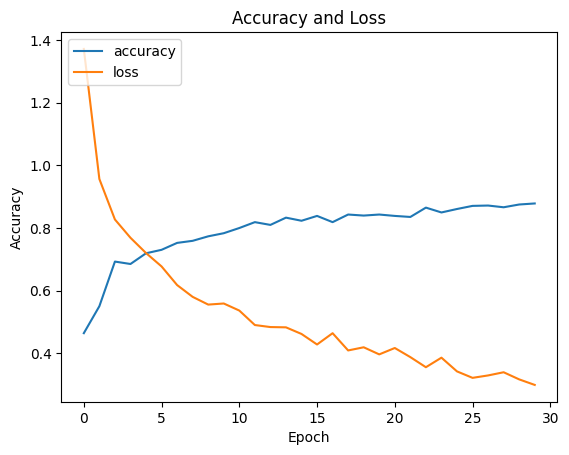

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.show()

plot_history(history)

In [ ]:
loss, accuracy = model.evaluate(valid_generator)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


11/11 [==============================] - 1s 89ms/step - loss: 0.2455 - accuracy: 0.8824
Validation Loss: 0.24545641243457794
Validation Accuracy: 0.8823529481887817


# Save the best model

In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/weather classifier model/model.h5")
print("Saved model to disk")



Saved model to disk


In [40]:
model.save("/content/drive/MyDrive/weather classifier model/weatherclassifier_MateoRoa.h5")

# Test a sample image using the saved best model

1/1 [==============================] - 0s 51ms/step


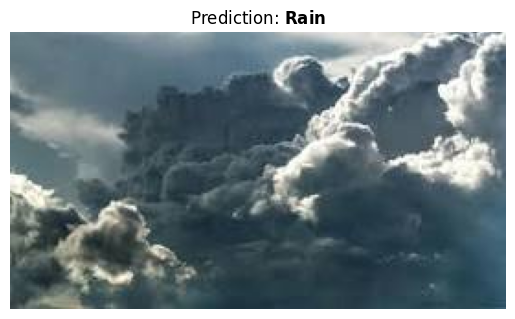

1/1 [==============================] - 0s 185ms/step


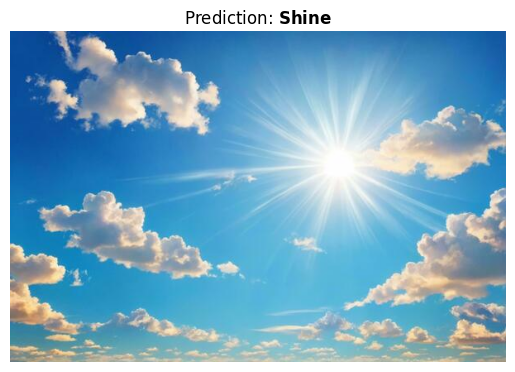

1/1 [==============================] - 0s 32ms/step


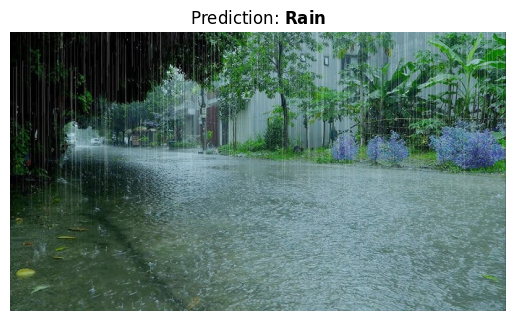

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((30, 30))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

image_paths = [
    '/content/drive/MyDrive/weather classifier model/testimg.jpeg',
    '/content/drive/MyDrive/weather classifier model/testimg1.jpg',
    '/content/drive/MyDrive/weather classifier model/testimg2.jpg',
]

category_labels = [
    'Cloudy',
    'Rain',
    'Shine',
    'Sunrise'
]

for image_path, true_label in zip(image_paths, category_labels):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_classification = np.argmax(predictions)

    plt.imshow(Image.open(image_path))
    plt.title(f'Prediction: $\mathbf{{{category_labels[predicted_classification]}}}$')
    plt.axis('off')

    plt.show()